In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns


In [2]:
checkpoints = r'C:\Users\Hp\Desktop\ml labs\last labs\lab 12\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'C:\Users\Hp\Desktop\ml labs\last labs\lab 11\computer vision\train'
validation_dir = r'C:\Users\Hp\Desktop\ml labs\last labs\lab 11\computer vision\validation'
test_dir = r'C:\Users\Hp\Desktop\ml labs\last labs\lab 11\computer vision\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                    callbacks=callbacks)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.8701 - acc: 0.6081
Epoch 1: val_loss improved from inf to 0.49452, saving model to C:\Users\Hp\Desktop\ml labs\last labs\lab 12\E1-cp-0001-loss0.49.h5
50/50 [==============================] - 350s 7s/step - loss: 0.8701 - acc: 0.6081 - val_loss: 0.4945 - val_acc: 0.7857
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.5114 - acc: 0.7619
Epoch 2: val_loss improved from 0.49452 to 0.44039, saving model to C:\Users\Hp\Desktop\ml labs\last labs\lab 12\E1-cp-0002-loss0.44.h5
50/50 [==============================] - 313s 6s/step - loss: 0.5114 - acc: 0.7619 - val_loss: 0.4404 - val_acc: 0.8056
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.4267 - acc: 0.7950
Epoch 3: val_loss improved from 0.44039 to 0.38112, saving model to C:\Users\Hp\Desktop\ml labs\last labs\lab 12\E1-cp-0003-loss0.38.h5
50/50 [==============================] - 298s 6s/step - loss: 0.4267 - acc: 0.7950 - val_

In [11]:
model_history.history

{'loss': [0.870055079460144,
  0.5114443302154541,
  0.4266852140426636,
  0.3579541742801666,
  0.35066676139831543,
  0.3048321008682251,
  0.272617369890213,
  0.25511327385902405,
  0.21721725165843964,
  0.2014721930027008],
 'acc': [0.6081249713897705,
  0.7618749737739563,
  0.7950000166893005,
  0.8299999833106995,
  0.8356249928474426,
  0.8543750047683716,
  0.8793749809265137,
  0.887499988079071,
  0.9049999713897705,
  0.9118750095367432],
 'val_loss': [0.4945175349712372,
  0.4403904676437378,
  0.3811185657978058,
  0.3937319219112396,
  0.31959179043769836,
  0.29011833667755127,
  0.28674182295799255,
  0.2950386106967926,
  0.24708347022533417,
  0.302449107170105],
 'val_acc': [0.7857142686843872,
  0.8055555820465088,
  0.8134920597076416,
  0.7976190447807312,
  0.8214285969734192,
  0.8452380895614624,
  0.8571428656578064,
  0.85317462682724,
  0.8928571343421936,
  0.8492063283920288]}

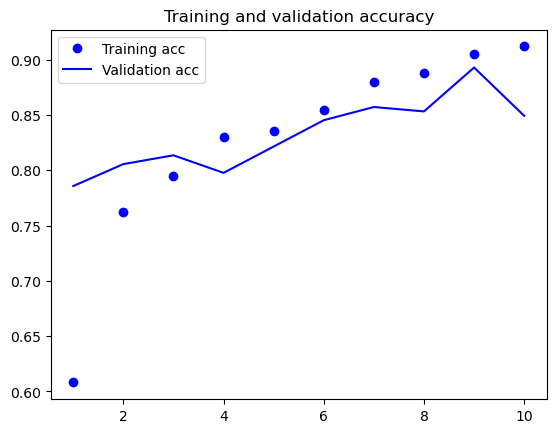

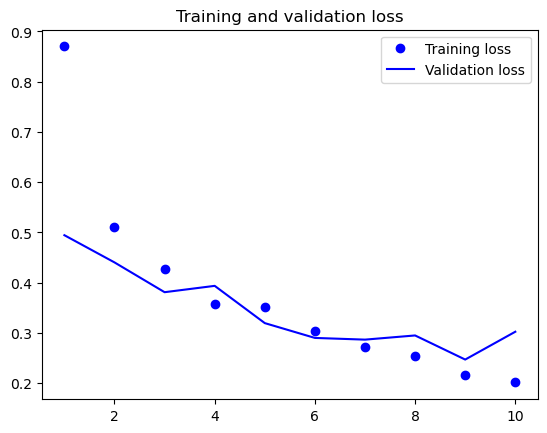

<Figure size 640x480 with 0 Axes>

In [12]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Hp\Desktop\ml labs\last labs\lab 11\model_Accuracy.png')

In [13]:
model.save(r'C:\Users\Hp\Desktop\ml labs\last labs\lab 11\E1-cp-0012-loss0.21.h5')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 12s 1s/step


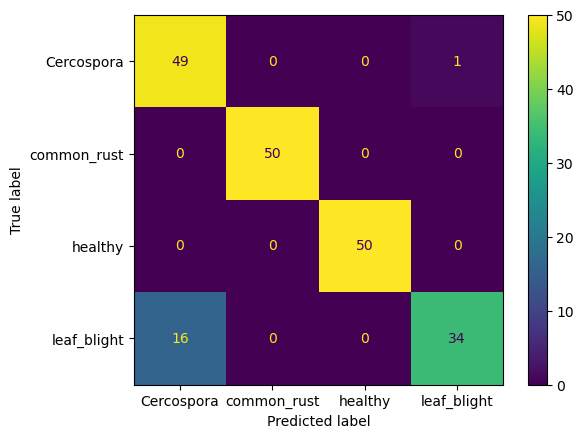

In [14]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [15]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.75      0.98      0.85        50
 common_rust       1.00      1.00      1.00        50
     healthy       1.00      1.00      1.00        50
 leaf_blight       0.97      0.68      0.80        50

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.91       200
weighted avg       0.93      0.92      0.91       200

